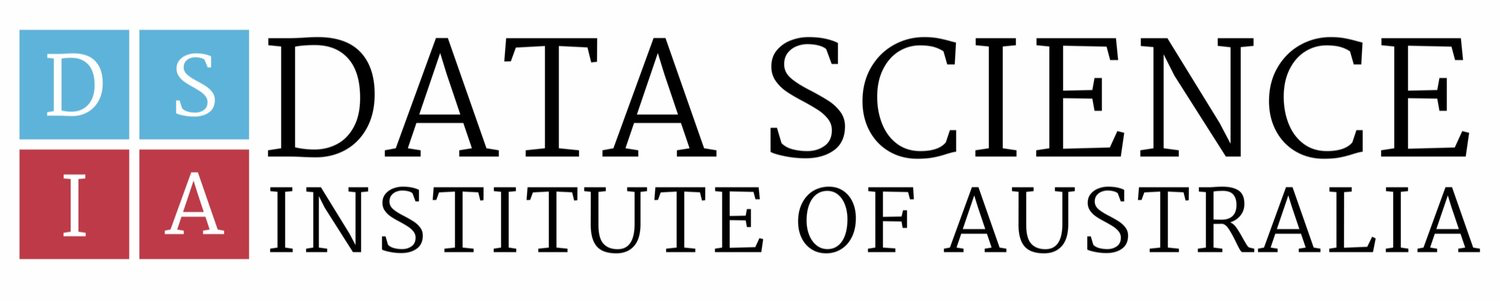

# Data Science and AI
## Lab 5.3: Support Vector Machines
SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features.

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called **kernels**.

INSTRUCTIONS:

- Run the cells
- Observe and understand the results
- Answer the questions

In [1]:
%matplotlib inline

In [2]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.svm import NuSVC

from sklearn.model_selection import train_test_split

## Linear SVM
Here we will apply a linear kernal to separate two clusters in 2D. This means our solution hyperplane will be a straight line in the x-y plane.

We will use the `SVC` (support vector classification) algorithm from the `svm` library.

Scikit-learn has a handy function for generating synthetic data in clusters:

In [3]:
# Create 40 separable points:
X, y = make_blobs(n_samples=4000, centers=2, random_state=6)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9433)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3200, 2), (3200,), (800, 2), (800,))

In [6]:
X.shape, y.shape

((4000, 2), (4000,))

In [7]:
print(' X_0    X_1     y')
print('------ ------ -----')
for i in range(11):
    print('%6.2f %6.2f   %s' % (X[i, 0], X[i, 1], y[i]))

 X_0    X_1     y
------ ------ -----
  5.66  -9.74   1
  7.63  -3.48   0
  8.28  -3.52   0
  7.06  -4.66   0
  5.03  -9.09   1
  6.95  -9.05   1
  9.02  -3.86   0
  6.78  -4.16   0
  9.38  -2.59   0
  5.36  -9.45   1
  7.31  -6.84   1


X is a 2-column matrix representing 40 (x,y) pairs and y is the cluster membership vector.

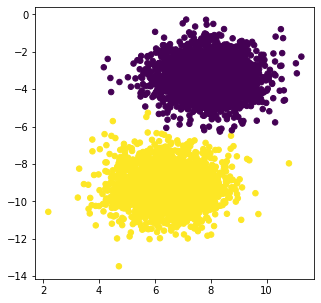

In [8]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
plt.show()

Like many Scikit-learn algorithms, SVC applies regularisation by default. For this demo, we will train the model with regularisation suppressed:

If a data dictionary is available, it is handy to include it in the notebook for reference:

In [9]:
# fit the model, without regularisation (make C large):
clf = SVC(kernel='linear', C=1000)
clf.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

This will plot the data with the solution hyperplane and dividing boundaries superimposed. Make sure to look up any methods you aren't familiar with and add some comments to explain what they are doing.

In [10]:
def plot_svm(X, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none')
    plt.show()

In [13]:
print('Training score:', clf.score(X_train, y_train))
print('Test     score:', clf.score(X_test, y_test))

Training score: 0.99875
Test     score: 1.0


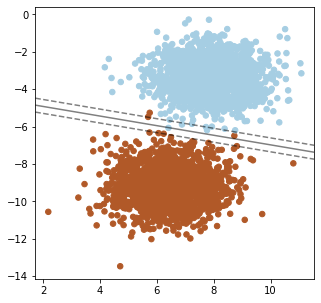

In [16]:
plot_svm(X_train, y_train)

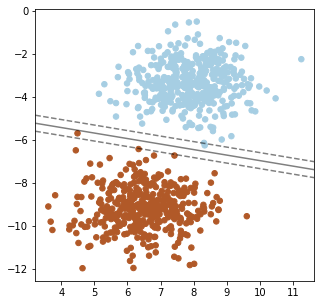

In [15]:
plot_svm(X_test, y_test)

### Nonlinear SVM
Here we will apply a nonlinear kernel to separate two classes where a linear kernel would fail. For this we will use the `NuSVC` algorithm from the `svm` library.

Generating this dataset relies on a logical trick to classify the points by which quadrant they are in:

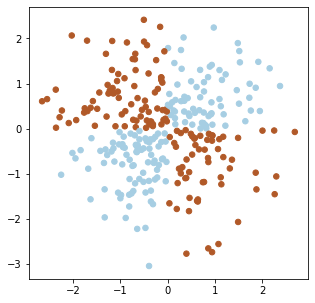

In [17]:
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

For this demo we will train the model using default parameters, so we instantiate an `NuSVC` with no arguments:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [19]:
# fit the model
clf = NuSVC(gamma='auto')
clf.fit(X_train, y_train)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

The next visualisation requires some tricky coding. The `NuSVC` class has a `decision_function` method that we can use to create a heatmap to show how the likelihood of class membership varies over the 2D feature space. The Numpy `meshgrid` function is useful for creating our 2D spatial grid, but the `decision_function` method need the the grid to be passed as a 2D array with x-values in the 1st column and y-values in the second:

In [20]:
def plot_NuSVC(X, y):
    # Plot the decision function for each datapoint on the grid ...

    # create a fine grid on which to calculate the function:
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

    # - use ravel() to transform each array into 1 contiguous vector
    # (row-wise or column-wise);
    # - then use c_[] to create an array with one column for each
    # or these two vectors;
    # - then apply the decision_function() to compute the distance
    # of each sample X to the separating hyperplane:
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # finally, change the shape of the result back into that of the original grid:
    Z = Z.reshape(xx.shape)  # put results back into original geometry

    plt.figure(figsize=(5, 5))
    # plot Z as a heatmap:
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)

    # plot decision boundaries:
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)

    # plot original data points:
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors='k')

    # scaling, final rendering:
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.show()

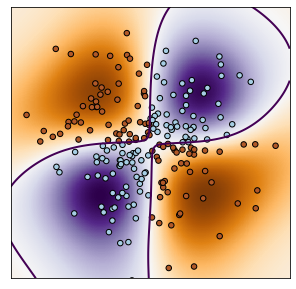

In [21]:
plot_NuSVC(X_train, y_train)

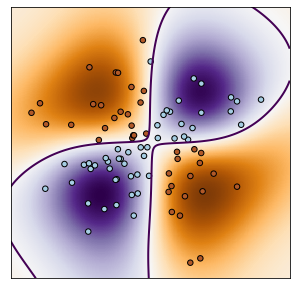

In [22]:
plot_NuSVC(X_test, y_test)

In [23]:
print('Training score:', clf.score(X_train, y_train))
print('Test     score:', clf.score(X_test, y_test))

Training score: 0.9904761904761905
Test     score: 0.9888888888888889
